In [32]:
import numpy as np
import pandas as pd
import os
import tarfile
from six.moves import urllib
import zipfile
import json
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:

df = pd.read_csv('processed_transaction.csv')
df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,733493772,3,5000.00,492,9184,0,5000.0,0.00,733493772,492,...,8,19,4,50,2020,4,1,2014,8,3
1,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,...,9,22,32,39,2023,6,1,2014,8,3
2,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,...,11,13,36,55,2027,12,1,2014,8,3
3,733493772,3,4676.52,492,9184,0,5000.0,323.48,733493772,492,...,11,22,47,46,2029,9,1,2014,8,3
4,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,1,41,11,2024,10,1,2014,8,3


In [3]:
df.columns

Index(['accountNumber', 'acqCountry', 'availableMoney', 'cardCVV',
       'cardLast4Digits', 'cardPresent', 'creditLimit', 'currentBalance',
       'customerId', 'enteredCVV', 'expirationDateKeyInMatch', 'isFraud',
       'merchantCategoryCode', 'merchantCountryCode', 'merchantName',
       'posConditionCode', 'posEntryMode', 'transactionAmount',
       'transactionType', 'accountOpenDate_year', 'accountOpenDate_month',
       'accountOpenDate_day', 'transactionDateTime_year',
       'transactionDateTime_month', 'transactionDateTime_day',
       'transactionDateTime_hour', 'transactionDateTime_minute',
       'transactionDateTime_second', 'currentExpDate_year',
       'currentExpDate_month', 'currentExpDate_day',
       'dateOfLastAddressChange_year', 'dateOfLastAddressChange_month',
       'dateOfLastAddressChange_day'],
      dtype='object')

In [3]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


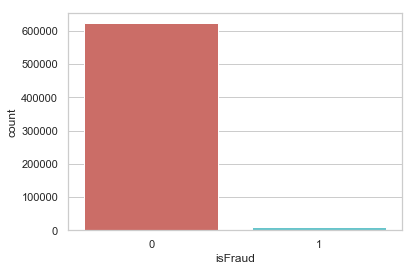

0    622954
1     10892
Name: isFraud, dtype: int64

In [5]:
sns.countplot(x='isFraud', data=df, palette='hls')
plt.show()
df['isFraud'].value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2502dac8>,
      dtype=object)

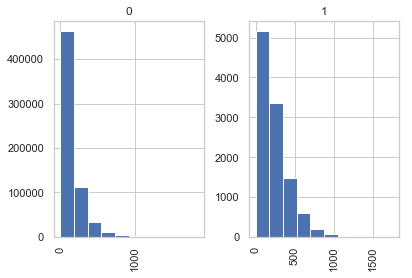

In [6]:
df['transactionAmount'].hist(by=df['isFraud'])

As we can see in the plot, most of the fraud transactions happen in low amount. it means there is not very high amount of fraud transactions. it's usaually because The bank would block these kind of high transactions easily for safety. so, it makes sense that the fraud transactions happen consistently in low prices. 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

In [8]:
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=SEED)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),5)
precision = round(precision_score(y_test, y_pred),5)
recall = round(recall_score(y_test, y_pred),5)
print('acc: {} precision: {} recal: {}'.format(accuracy, precision, recall))

acc: 0.98262 precision: 0.86957 recal: 0.00602


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[186829      3]
 [  3302     20]]


The result is telling us that we have 186829+20 correct predictions and 3302+3 incorrect predictions.

Text(0.5, 12.5, 'Predicted label')

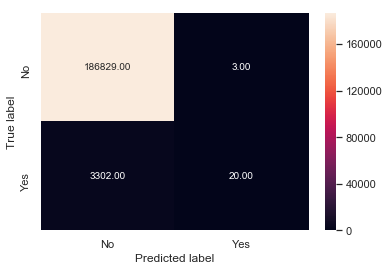

In [15]:

import seaborn as sn
sn.heatmap(confusion_matrix, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

- Every observation in the testing set is represented in exactly one box
- It's a 2x2 matrix because there are 2 response classes

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    186832
           1       0.87      0.01      0.01      3322

   micro avg       0.98      0.98      0.98    190154
   macro avg       0.93      0.50      0.50    190154
weighted avg       0.98      0.98      0.97    190154



array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2616c3c8>,
      dtype=object)

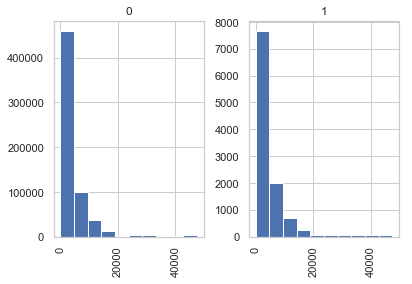

In [17]:
df['currentBalance'].hist(by=df['isFraud'])

#### Resample 

In [18]:
# unblanaced data
df.groupby('isFraud').count()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
isFraud,,,,,,,,,,,,,,,,,,,,,
0,622954,622954,622954,622954,622954,622954,622954,622954,622954,622954,...,622954,622954,622954,622954,622954,622954,622954,622954,622954,622954
1,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892,...,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892


In [19]:
df_false = df[df.isFraud==False]

In [20]:
df_true = df[df.isFraud==True]

In [21]:
df_false_sample = df_false.sample(df_true.shape[0], replace=False)

In [22]:
df = df_true.append(df_false_sample)

In [23]:
df.groupby('isFraud').count()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
isFraud,,,,,,,,,,,,,,,,,,,,,
0,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892,...,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892
1,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892,...,10892,10892,10892,10892,10892,10892,10892,10892,10892,10892


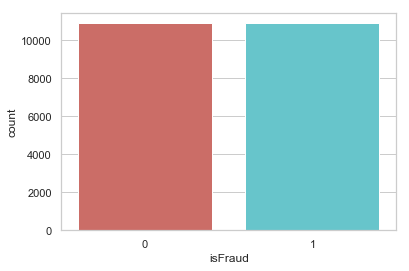

1    10892
0    10892
Name: isFraud, dtype: int64

In [24]:
sns.countplot(x='isFraud', data=df, palette='hls')
plt.show()
df['isFraud'].value_counts()

In [25]:
# before we start anything, we split data into train and test, and put aside test part
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [26]:
df_x = train_set.drop('isFraud',axis=1)
df_y = train_set['isFraud'].copy()

In [27]:
df_x_numeric = df_x.drop(['acqCountry','cardPresent',
                          'expirationDateKeyInMatch','merchantCategoryCode','merchantCountryCode'
                         ], axis=1)

In [34]:
num_pipeline = Pipeline([('std_scalaer', StandardScaler())])
cat_pipeline = Pipeline([('onehot',OneHotEncoder())])
num_attributes = list(df_x_numeric)
cat_attributes = ['acqCountry','cardPresent','expirationDateKeyInMatch',
                  'merchantCategoryCode','merchantCountryCode']
    
    
full_pipeline = ColumnTransformer([
                ('num',num_pipeline,num_attributes),
                ('cat',cat_pipeline,cat_attributes)])



In [35]:
df_prepared = full_pipeline.fit_transform(df_x)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, Fut

In [36]:
df_x_test = test_set.drop('isFraud',axis=1)
df_y_test = test_set['isFraud'].copy()

In [37]:
df_x_test_prepared = full_pipeline.fit_transform(df_x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, Fut

In [38]:
# build series of models:
rf_clf = RandomForestClassifier(n_estimators=10) # random forest
lr_clf = LogisticRegression() # Logistic Regression
tree_clf = DecisionTreeClassifier(max_depth = 2) # tree

In [39]:
rf_clf.fit(df_prepared, df_y)
lr_clf.fit(df_prepared, df_y)
tree_clf.fit(df_prepared, df_y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# in_sample evaluation: evaluate classifier with train data.

In [41]:
y_pred_rf_tr = rf_clf.predict(df_prepared)
y_pred_lr_tr = lr_clf.predict(df_prepared)
y_pred_tree_tr = tree_clf.predict(df_prepared)

In [42]:
print("-------   Let's loook at in_sample performance (AUC)----------------")
print('AUC for Random Forest Classifier is {}'.format(roc_auc_score(df_y, y_pred_rf_tr)))
print('AUC for Logistic Regression Classifier is {}'.format(roc_auc_score(df_y, y_pred_lr_tr)))
print('AUC for Tree Classifier is {}'.format(roc_auc_score(df_y, y_pred_tree_tr)))

-------   Let's loook at in_sample performance (AUC)----------------
AUC for Random Forest Classifier is 0.9892170158883025
AUC for Logistic Regression Classifier is 0.6501478827011484
AUC for Tree Classifier is 0.636392539272946


In [54]:
recall = round(recall_score(df_y, y_pred_tree_tr),5)
print('recall for Tree Classifier:' , recall)

recall for Tree Classifier: 0.75849


In [43]:
print("-------   Let's loook at in_sample performance (F1 Score) ----------------")
print('F1 score for Random Forest Classifier is {}'.format(f1_score(df_y, y_pred_rf_tr)))
print('F1 score for Logistic Regression Classifier is {}'.format(f1_score(df_y, y_pred_lr_tr)))
print('F1 score for Tree Classifier is {}'.format(f1_score(df_y, y_pred_tree_tr)))

-------   Let's loook at in_sample performance (F1 Score) ----------------
F1 score for Random Forest Classifier is 0.9891492554542306
F1 score for Logistic Regression Classifier is 0.6468578048074138
F1 score for Tree Classifier is 0.6761744108776773


In [44]:
# out_of_sample evaluation : Evaluate classifier with test data

In [45]:
y_pred_rf = rf_clf.predict(df_x_test_prepared)
y_pred_lr = lr_clf.predict(df_x_test_prepared)
y_pred_tree = tree_clf.predict(df_x_test_prepared)

In [46]:
print("-------   Let's loook at out_of_sample performance (AUC) ----------------")
print('AUC for Random Forest Classifier is {}'.format(roc_auc_score(df_y_test, y_pred_rf)))
print('AUC for Logistic Regression Classifier is {}'.format(roc_auc_score(df_y_test, y_pred_lr)))
print('AUC for Tree Classifier is {}'.format(roc_auc_score(df_y_test, y_pred_tree)))

-------   Let's loook at out_of_sample performance (AUC) ----------------
AUC for Random Forest Classifier is 0.680289391506631
AUC for Logistic Regression Classifier is 0.6674020506466743
AUC for Tree Classifier is 0.6558424044738318


In [47]:
print("-------   Let's loook at out_of_sample performance (F1 Score) ----------------")
print('F1 score for Random Forest Classifier is {}'.format(f1_score(df_y_test, y_pred_rf)))
print('F1 score for Logistic Regression Classifier is {}'.format(f1_score(df_y_test, y_pred_lr)))
print('F1 score for Tree Classifier is {}'.format(f1_score(df_y_test, y_pred_tree)))

-------   Let's loook at out_of_sample performance (F1 Score) ----------------
F1 score for Random Forest Classifier is 0.6537313432835821
F1 score for Logistic Regression Classifier is 0.6634146341463415
F1 score for Tree Classifier is 0.6907067793117658
